In [1]:
"""This demo shows how to explicitly transform the vertices 
of a .ply shape. 

To display interactive plots, convert the notebook to a script. 

"""

from vedo import dataurl, Mesh, Sphere, show
import numpy as np

In [2]:
# Reads the mesh data (.ply file) from a given URL location
spider = Mesh(dataurl+"spider.ply")

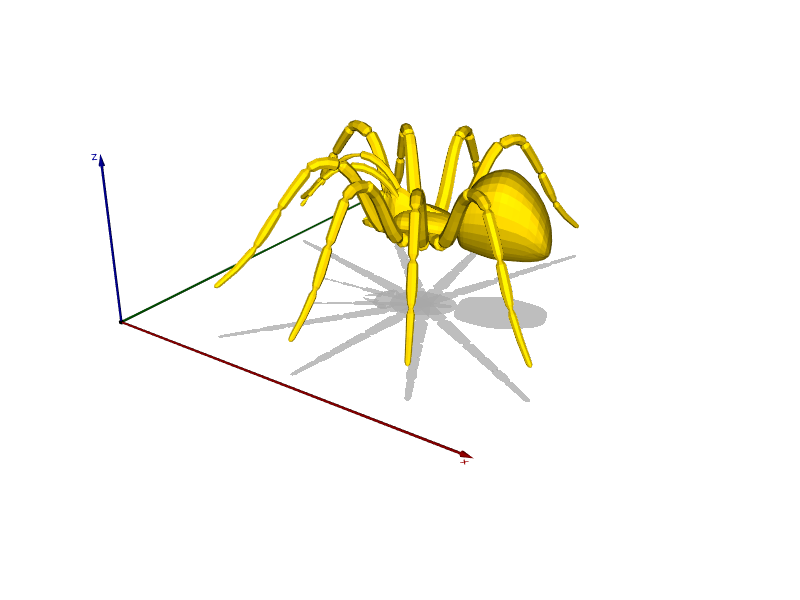

In [3]:
# Activate the shadow along the z-axis (i.e., light source points down on the z-axis) 
spider.add_shadow('z', 0, alpha=0.5)

# Display spider with z-axis up 
show(spider, axes=2, viewup="z")

#show(spider, axes=2, viewup="z").close()    Method close() seems to work only in script mode


In [4]:
# Get the numpy array containing the coordinates 
# of the vertices
pts = spider.points()

In [5]:
# Check the shape to ensure the dimensions will be correct when 
# performing matrix multiplication (transformations)
pts.shape

(4670, 3)

In [6]:
# We want a 3xN matrix so transpose matrix of points to be 3xN
pts = pts.transpose()

In [7]:
# Scaling transformation (explict form)
S = np.array(
    [[2.0, 0.0, 0.0], 
     [0.0, 0.5, 0.0],
     [0.0, 0.0, 1.0]])

In [8]:
# Apply the transformation (matrix multiplication). We could also use 
# np.dot()
pts_ = S @ pts
#pts_ = np.dot(S,pts)
print(pts_)

[[3.61139989 3.62899995 3.64660001 ... 3.15280008 3.06340003 3.00099993]
 [1.01719999 1.02030003 1.0108     ... 1.4461     1.43990004 1.43859994]
 [1.61539996 1.58109999 1.61049998 ... 1.69920003 1.65260005 1.61049998]]


In [9]:
# Make a copy of the original shape
spider2 = spider.clone();

# Set the vertices of the new (transformed) shape
spider2.points(pts_)

# Change the color to red
spider2.c("red")

<Mesh(0x7fe4d16f4650) at 0x7fe4d1d07760>

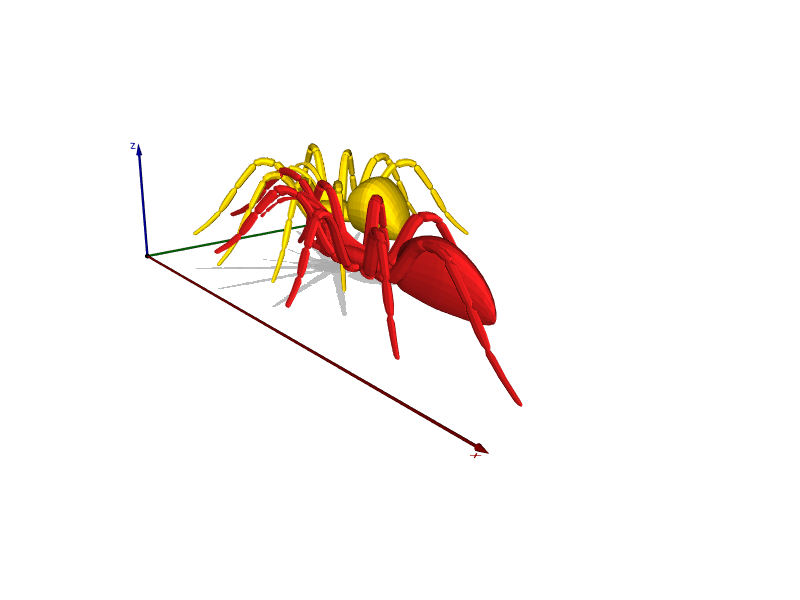

In [10]:
show(spider,spider2, axes=2, viewup="z", title="Scaled shape")